# Python niche packages
Author = R. Patrick Xian  
Date = 09/2017

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. xarray

In [1]:
import xarray

## 2. lmfit

In [6]:
import lmfit.models as m

In [8]:
mods = [md for md in dir(m) if 'Model' in md]
print(mods)

['BreitWignerModel', 'ComplexConstantModel', 'ConstantModel', 'DampedHarmonicOscillatorModel', 'DampedOscillatorModel', 'DonaichModel', 'ExponentialGaussianModel', 'ExponentialModel', 'ExpressionModel', 'GaussianModel', 'LinearModel', 'LognormalModel', 'LorentzianModel', 'Model', 'MoffatModel', 'ParabolicModel', 'Pearson7Model', 'PolynomialModel', 'PowerLawModel', 'PseudoVoigtModel', 'QuadraticModel', 'RectangleModel', 'SkewedGaussianModel', 'StepModel', 'StudentsTModel', 'VoigtModel']


In [14]:
from lmfit.models import GaussianModel, ExponentialModel
import sys

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(exponential, prefix='exp_'))
[[Variables]]
    exp_decay:       90.9508859 +/- 1.103105 (1.21%) (init= 93.24905)
    exp_amplitude:   99.0183282 +/- 0.537487 (0.54%) (init= 162.2102)
    g1_sigma:        16.6725753 +/- 0.160481 (0.96%) (init= 15)
    g1_center:       107.030954 +/- 0.150067 (0.14%) (init= 105)
    g1_amplitude:    4257.77319 +/- 42.38336 (1.00%) (init= 2000)
    g1_fwhm:         39.2609139 +/- 0.377905 (0.96%)  == '2.3548200*g1_sigma'
    g1_height:       101.880231 +/- 0.592170 (0.58%)  == '0.3989423*g1_amplitude/max(1.e-15, g1_sigma)'
    g2_sigma:        13.8069484 +/- 0.186794 (1.35%) (init= 15)
    g2_center:       153.270100 +/- 0.194667 (0.13%) (init= 155)
    g2_amplitude:    2493.41770 +/- 36.16947 (1.45%) (init= 2000)
    g2_fwhm:         32.5128782 +/- 0.439866 (1.35%)  == '2.3548200*g2_sigma'
    g2_height:       72.0455934 +/- 0.617220 (0.86%)  == '0.3989423*g2_amplitude

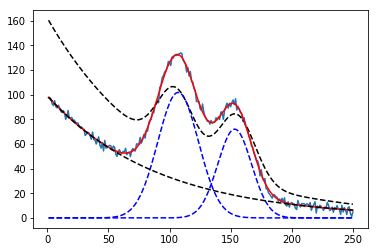

In [15]:
dat = np.loadtxt('..//files//NIST_Gauss2.dat')
x = dat[:, 1]
y = dat[:, 0]

exp_mod = ExponentialModel(prefix='exp_')
pars = exp_mod.guess(y, x=x)

gauss1  = GaussianModel(prefix='g1_')
pars.update( gauss1.make_params())

pars['g1_center'].set(105, min=75, max=125)
pars['g1_sigma'].set(15, min=3)
pars['g1_amplitude'].set(2000, min=10)

gauss2  = GaussianModel(prefix='g2_')

pars.update(gauss2.make_params())

pars['g2_center'].set(155, min=125, max=175)
pars['g2_sigma'].set(15, min=3)
pars['g2_amplitude'].set(2000, min=10)

mod = gauss1 + gauss2 + exp_mod


init = mod.eval(pars, x=x)
plt.plot(x, y)
plt.plot(x, init, 'k--')

out = mod.fit(y, pars, x=x)

comps = out.eval_components(x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.plot(x, comps['g1_'], 'b--')
plt.plot(x, comps['g2_'], 'b--')
plt.plot(x, comps['exp_'], 'k--')

## 3. scikit-image

In [2]:
from skimage import morphology